In [ ]:
Notebook to get and clean the data of Les echos Newspaper about covid19 vaccination

In [1]:
from helpers import *

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('Avec agences', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

# LES ECHOS

In [8]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [9]:
search_url='https://www.lesechos.fr/industrie-services/pharmacie-sante/vaccins?page=1'

driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
# Aceptar cookkies

In [12]:
# There are 58pages of vacinnes, but just 51 are from Covid: 
list_search_url =[]
list_search_url.append("https://www.lesechos.fr/industrie-services/pharmacie-sante/vaccins?page=1" )
for i in range(2, 52):
    list_search_url.append(f"https://www.lesechos.fr/industrie-services/pharmacie-sante/vaccins?page={i}")

In [73]:
from bs4 import BeautifulSoup
import requests
list_urls_noise=[]
for i in list_search_url:
    url=i
    soup=BeautifulSoup(requests.get(url).text)
    box=soup.find_all(class_='sc-1vhx99f-0 bLivPw')
    for p in box:
            r=p.find_all('a')
            urls=[x['href'] for x in r]
            list_urls_noise.append(urls)



In [77]:
list_of_links=[]
for i in range(len(list_urls_noise)): 
    try:
        url=list_urls_noise[i][1]
        list_of_links.append('https://www.lesechos.fr'+url)
    except: 
        continue

In [80]:
len(set(list_of_links))

2445

In [82]:
list_of_links

['https://www.lesechos.fr/politique-societe/societe/covid-la-france-restreint-lacces-des-voyageurs-en-provenance-du-royaume-uni-1373009',
 'https://www.lesechos.fr/industrie-services/pharmacie-sante/covid-valneva-annonce-des-resultats-positifs-pour-le-rappel-de-son-candidat-vaccin-1372988',
 'https://www.lesechos.fr/industrie-services/pharmacie-sante/sanofi-novavax-valneva-curevac-ou-en-sont-les-autres-vaccins-contre-le-covid-1372971',
 'https://www.lesechos.fr/industrie-services/pharmacie-sante/covid-pourquoi-sanofi-ne-rattrape-pas-son-retard-dans-la-course-au-vaccin-1372944',
 'https://www.lesechos.fr/monde/asie-pacifique/covid-malgre-une-vaccination-record-la-coree-du-sud-contrainte-de-retablir-des-couvre-feux-1372911',
 'https://www.lesechos.fr/politique-societe/emmanuel-macron-president/interview-demmanuel-macron-sur-tf1-ce-quil-faut-retenir-1372907',
 'https://www.lesechos.fr/economie-france/social/covid-la-cinquieme-vague-balaie-lespoir-dun-noel-tranquille-1372847',
 'https://ww

In [81]:
# Store the list in a document
with open("list_links_echos.txt", 'w') as f:
    for s in list_of_links:
        f.write(str(s) + '\n')

In [5]:
with open("list_links_echos.txt", 'r') as f:
    list_links_echos = [line.rstrip('\n') for line in f]
    list_links_echos= list(set(list_links_echos))
len(list_links_echos)

2445

In [6]:
def get_html_echos(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LES_ECHOS/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [10]:
get_html_echos( list_links_echos)

In [3]:
import os
list_articles_echos=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LES_ECHOS/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LES_ECHOS/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
#         regex= re.compile('sc-1oe11kk-0')
#         author=soup.find_all("a",{"class" : regex})[15].text.strip() 
        author=soup.find(class_='sc-14kwckt-6 sc-1ohdft1-0 osHIH iKZaAf').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="sc-14kwckt-6 sc-1ohdft1-0 hqULrA bISRZO").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find(class_="sc-1i0ieo8-0 cydQRA").text.strip()
    except: 
        date="error"
    try:
        #tweets in the middle of the article
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        #headlines at the end
        headlines_end = soup.find_all("div",class_="sc-aamjrj-0 sc-1bgc14k-4 tDgTh hYNbEf")
        for headline in headlines_end:
            headline.decompose()
    except: 
        pass
    try:
        regex= re.compile('sc-1r87fjh-0')
        tf=soup.find("div", {"class" : regex}).find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text="error"
    list_articles_echos.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
import pandas as pd
articles_echos = pd.DataFrame.from_dict(list_articles_echos)

articles_echos

,Title,Subheadline,Text,Authors,Date,Link
0,Covid : la droite réclame un dépistage « massi...,Pour éviter une troisième vague de l'épidémie ...,"Dans chaque niche fiscale, a-t-on coutume de d...",Pierre-Alain Furbury,Publié le 1 déc. 2020 à 12:57,https://www.lesechos.fr/politique-societe/poli...
1,Covid : ce qu'il faut retenir de la journée du...,Le nombre de patients atteints du Covid accuei...,La pandémie de Covid-19 a fait au moins 1.835....,error,Publié le 4 janv. 2021 à 6:42,https://www.lesechos.fr/monde/enjeux-internati...
2,"Bourse, Covid-19, Omicron. Noël au tison","Confrontés au variant Omicron, les investisseu...",L'écrivain Ambrose Bierce définissait une cala...,error,Publié le 28 nov. 2021 à 15:03,https://www.lesechos.fr/idees-debats/crible/bo...
3,Covid : Anne Hidalgo ne veut pas d'un confinem...,Anne Hidalgo a réitéré son désaccord avec un é...,Le bras de fer est bien installé. Alors que le...,Laurent Thévenin,Publié le 1 mars 2021 à 19:34,https://www.lesechos.fr/politique-societe/regi...
4,"Covid : après Sanofi, Novartis va aider BioNTe...","Le laboratoire helvétique, qui ne développe pa...",Novartis aussi veut participer à l'effort de g...,Enrique Moreira,Publié le 29 janv. 2021 à 19:40,https://www.lesechos.fr/industrie-services/pha...
...,...,...,...,...,...,...
2440,Covid : le PDG de Moderna entre au classement ...,"Malgré la crise due au Covid, quatre nouveaux ...",Les milliardaires français ont traversé la cri...,Les Echos,Publié le 6 avr. 2021 à 17:14,https://www.lesechos.fr/industrie-services/ser...
2441,EXCLUSIF - Gabriel Attal : « Certains lieux cu...,"Le porte-parole du gouvernement, Gabriel Attal...","Les terrasses de café rouvrent au Royaume-Uni,...",Propos recueillis par Isabelle Ficek et Lucie ...,Publié le 15 avr. 2021 à 19:49,https://www.lesechos.fr/politique-societe/gouv...
2442,Le Royaume-Uni recommande d'éviter le vaccin d...,Après le décès de 19 personnes sur 79 cas de c...,Le comité scientifique supervisant la campagne...,Alexandre Counis (Correspondant à Londres),Publié le 7 avr. 2021 à 17:07,https://www.lesechos.fr/monde/europe/le-regula...
2443,Nouvelles règles du jeuContenu réservé aux abo...,Il n'y aura pas de retour à la normale. La mon...,L'heure du retour à la normale n'est ni pour a...,David Barroux,Publié le 29 août 2021 à 14:54,https://www.lesechos.fr/idees-debats/editos-an...


# CLEAN DATASET

In [7]:
# clean text
articles_echos['Text']=articles_echos['Text'].apply(preprocessor)
articles_echos['Title']=articles_echos['Title'].apply(preprocessor)

In [8]:
articles_echos['Newspaper']= 'Les Echos'
articles_echos['Country']= 'France'
articles_echos['n_words'] = articles_echos.Text.apply(lambda x: len(str(x).split(' ')))

In [9]:
#Date
articles_echos['Date'] = articles_echos['Date'].str.split("Publié le ").str[1]
for index,row in articles_echos.iterrows(): 
    try:
        articles_echos['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue
articles_echos['Date'] = pd.to_datetime(articles_echos['Date'])

/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
/tmp/ipykernel_188109/612640259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_echos['Date'][index] =dateparser.parse(row.Date).date()


In [10]:
articles_echos=articles_echos.drop_duplicates()
articles_echos=articles_echos[articles_echos.Text.str.contains("vacc")|articles_echos.Subheadline.str.contains("vacc")|articles_echos.Title.str.contains("vacc")]

In [13]:
#Eliminate before 2020
articles_echos=articles_echos[articles_echos['Date']>'2020-01-01']
articles_echos

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
0,Covid: la droite réclame un dépistage «massif»...,Pour éviter une troisième vague de l'épidémie ...,"Dans chaque niche fiscale, a-t-on coutume de d...",Pierre-Alain Furbury,2020-12-01,https://www.lesechos.fr/politique-societe/poli...,Les Echos,France,438
1,Covid: ce quil faut retenir de la journée du l...,Le nombre de patients atteints du Covid accuei...,La pandémie de Covid-19 a fait au moins 1.835....,error,2021-01-04,https://www.lesechos.fr/monde/enjeux-internati...,Les Echos,France,2736
2,"Bourse, Covid-19, Omicron. Noël au tison","Confrontés au variant Omicron, les investisseu...",Lécrivain Ambrose Bierce définissait une calam...,error,2021-11-28,https://www.lesechos.fr/idees-debats/crible/bo...,Les Echos,France,221
3,Covid: Anne Hidalgo ne veut pas dun confinemen...,Anne Hidalgo a réitéré son désaccord avec un é...,Le bras de fer est bien installé. Alors que le...,Laurent Thévenin,2021-03-01,https://www.lesechos.fr/politique-societe/regi...,Les Echos,France,498
4,"Covid: après Sanofi, Novartis va aider BioNTec...","Le laboratoire helvétique, qui ne développe pa...",Novartis aussi veut participer à leffort de gu...,Enrique Moreira,2021-01-29,https://www.lesechos.fr/industrie-services/pha...,Les Echos,France,396
...,...,...,...,...,...,...,...,...,...
2440,Covid : le PDG de Moderna entre au classement ...,"Malgré la crise due au Covid, quatre nouveaux ...",Les milliardaires français ont traversé la cri...,Les Echos,2021-04-06,https://www.lesechos.fr/industrie-services/ser...,Les Echos,France,437
2441,EXCLUSIF - Gabriel Attal: «Certains lieux cult...,"Le porte-parole du gouvernement, Gabriel Attal...","Les terrasses de café rouvrent au Royaume-Uni,...",Propos recueillis par Isabelle Ficek et Lucie ...,2021-04-15,https://www.lesechos.fr/politique-societe/gouv...,Les Echos,France,1272
2442,Le Royaume-Uni recommande déviter le vaccin dA...,Après le décès de 19 personnes sur 79 cas de c...,Le comité scientifique supervisant la campagne...,Alexandre Counis (Correspondant à Londres),2021-04-07,https://www.lesechos.fr/monde/europe/le-regula...,Les Echos,France,593
2443,Nouvelles règles du jeuContenu réservé aux abo...,Il n'y aura pas de retour à la normale. La mon...,Lheure du retour à la normale nest ni pour auj...,David Barroux,2021-08-29,https://www.lesechos.fr/idees-debats/editos-an...,Les Echos,France,424


In [16]:
articles_echos.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_echos_16_12_2021_premium.csv', index = False)

In [17]:
df = pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_echos_16_12_2021_premium.csv')

## NER

In [45]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [46]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [47]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

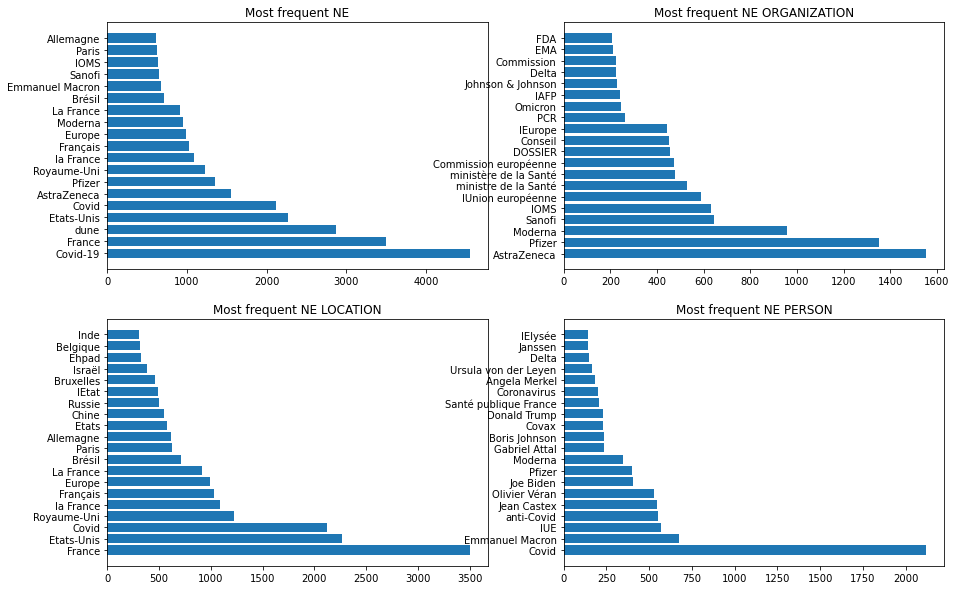

In [48]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')